Now we assume we have already ran the feature comparison code

# Unsimilar datasets comparison

/tmp/ipykernel_932991/587980976.py:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_cont = cm.get_cmap("viridis").copy()
/tmp/ipykernel_932991/587980976.py:64: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  matrix_binary = matrix.applymap(lambda x: 1 if x >= 0.5 else 0)


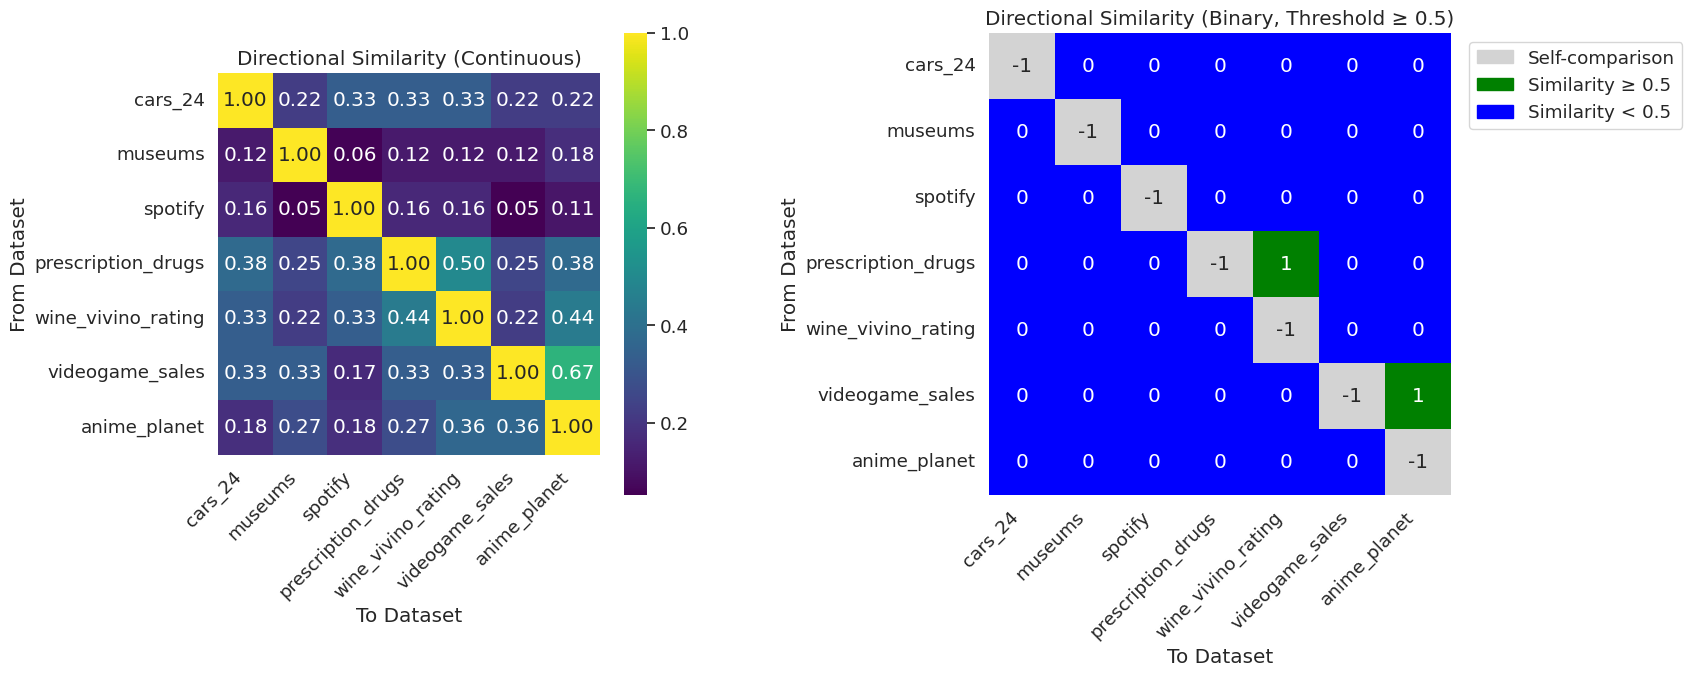

In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

# Define the unsimilar datasets list (order as desired)
unsimilar_datasets = [
    "carte_used_cars_24",
    "carte_museums", "carte_spotify", "carte_prescription_drugs",
    "carte_wine_vivino_rating", "carte_videogame_sales", "carte_anime_planet"
]

# Generate display labels by stripping "carte_" and "used_"
dataset_labels = [ds.replace("carte_", "").replace("used_", "") for ds in unsimilar_datasets]

# Load the comparison results
results_file_path = "json_files/unsimilar_and_cars_datasets_comparisons.json"
with open(results_file_path, "r", encoding="utf-8") as f:
    results = json.load(f)

# Initialize directional similarity matrix
matrix = pd.DataFrame(index=unsimilar_datasets, columns=unsimilar_datasets, dtype=float)
for ds in unsimilar_datasets:
    matrix.loc[ds, ds] = 1.0

# Fill similarity scores
for key, res in results.items():
    if "vs" not in key:
        continue
    try:
        ds1, ds2 = [s.strip() for s in key.split("vs")]
    except Exception as e:
        print(f"Error parsing key: {key}: {e}")
        continue

    if isinstance(res, dict) and "similar_features" in res and "dissimilar_features" in res:
        similar_features = res["similar_features"]
        num_similar = len(similar_features)
        dissim_ds1 = res["dissimilar_features"].get("dataset1", [])
        dissim_ds2 = res["dissimilar_features"].get("dataset2", [])
        total_ds1 = num_similar + len(dissim_ds1)
        total_ds2 = num_similar + len(dissim_ds2)

        sim_ds1_to_ds2 = num_similar / total_ds1 if total_ds1 else 0
        sim_ds2_to_ds1 = num_similar / total_ds2 if total_ds2 else 0

        if ds1 in unsimilar_datasets and ds2 in unsimilar_datasets:
            matrix.loc[ds1, ds2] = sim_ds1_to_ds2
            matrix.loc[ds2, ds1] = sim_ds2_to_ds1

# Fill missing values
matrix = matrix.fillna(0)

# Create masked matrix for continuous plot
matrix_masked = np.ma.masked_equal(matrix.values, 0)
cmap_cont = cm.get_cmap("viridis").copy()
cmap_cont.set_bad(color="lightgrey")

# Create binary matrix and set diagonal to 2 (self-comparison)
matrix_binary = matrix.applymap(lambda x: 1 if x >= 0.5 else 0)
for ds in unsimilar_datasets:
    matrix_binary.loc[ds, ds] = -1

# Define 3-color binary colormap
cmap_binary = ListedColormap(["lightgrey", "blue", "green"])

# Plot
sns.set(style="whitegrid", font_scale=1.2)
fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'wspace': 0.6})

# Continuous heatmap
sns.heatmap(matrix_masked, cmap=cmap_cont, cbar=True, annot=True, fmt=".2f",
            xticklabels=dataset_labels, yticklabels=dataset_labels, ax=axs[0], square=True)
axs[0].set_title("Directional Similarity (Continuous)")
axs[0].set_xlabel("To Dataset")
axs[0].set_ylabel("From Dataset")

# Binary heatmap
sns.heatmap(matrix_binary, cmap=cmap_binary, cbar=False, annot=True, fmt="d",
            xticklabels=dataset_labels, yticklabels=dataset_labels, ax=axs[1], square=True)
axs[1].set_title("Directional Similarity (Binary, Threshold ≥ 0.5)")
axs[1].set_xlabel("To Dataset")
axs[1].set_ylabel("From Dataset")

# Add updated legend
legend_patches = [
    Patch(color='lightgrey', label='Self-comparison'),
    Patch(color='green', label='Similarity ≥ 0.5'),
    Patch(color='blue', label='Similarity < 0.5')
]
axs[1].legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.02, 1.0), frameon=True)

# Rotate labels
for ax in axs:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
        tick.set_horizontalalignment('right')

plt.show()


Now let's view how the number of similar features look on paper

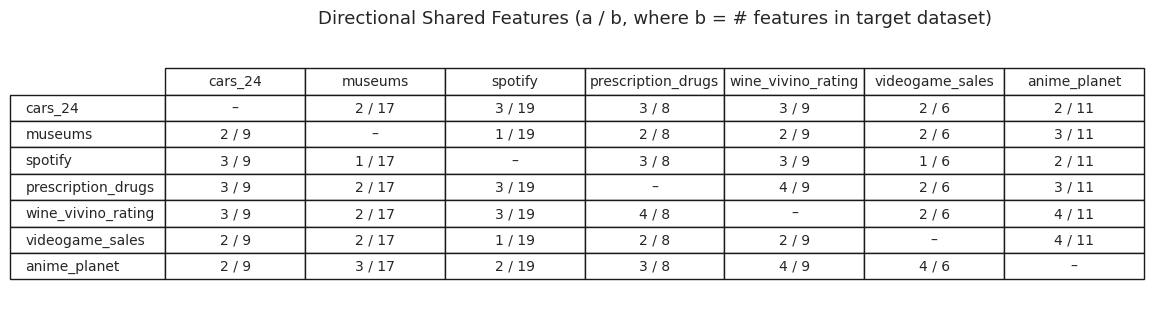

\begin{tabular}{lccccccc}
\toprule
 & cars\_24 & museums & spotify & prescription\_drugs & wine\_vivino\_rating & videogame\_sales & anime\_planet \\
\midrule
cars\_24 & – & 2 / 17 & 3 / 19 & 3 / 8 & 3 / 9 & 2 / 6 & 2 / 11 \\
museums & 2 / 9 & – & 1 / 19 & 2 / 8 & 2 / 9 & 2 / 6 & 3 / 11 \\
spotify & 3 / 9 & 1 / 17 & – & 3 / 8 & 3 / 9 & 1 / 6 & 2 / 11 \\
prescription\_drugs & 3 / 9 & 2 / 17 & 3 / 19 & – & 4 / 9 & 2 / 6 & 3 / 11 \\
wine\_vivino\_rating & 3 / 9 & 2 / 17 & 3 / 19 & 4 / 8 & – & 2 / 6 & 4 / 11 \\
videogame\_sales & 2 / 9 & 2 / 17 & 1 / 19 & 2 / 8 & 2 / 9 & – & 4 / 11 \\
anime\_planet & 2 / 9 & 3 / 17 & 2 / 19 & 3 / 8 & 4 / 9 & 4 / 6 & – \\
\bottomrule
\end{tabular}



In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Dataset list and clean labels
unsimilar_datasets = [
    "carte_used_cars_24",
    "carte_museums", "carte_spotify", "carte_prescription_drugs",
    "carte_wine_vivino_rating", "carte_videogame_sales", "carte_anime_planet"
]
dataset_labels = [ds.replace("carte_", "").replace("used_", "") for ds in unsimilar_datasets]

# Load JSON
results_file_path = "json_files/unsimilar_and_cars_datasets_comparisons.json"
with open(results_file_path, "r", encoding="utf-8") as f:
    results = json.load(f)

# Initialize matrix with strings
matrix_str = pd.DataFrame(index=unsimilar_datasets, columns=unsimilar_datasets, dtype=str)

# Fill entries in both directions
for key, res in results.items():
    if "vs" not in key:
        continue
    try:
        ds1, ds2 = [s.strip() for s in key.split("vs")]
    except Exception:
        continue

    if isinstance(res, dict) and "similar_features" in res and "dissimilar_features" in res:
        num_similar = len(res["similar_features"])
        dissim_ds1 = res["dissimilar_features"].get("dataset1", [])
        dissim_ds2 = res["dissimilar_features"].get("dataset2", [])
        total_ds1 = num_similar + len(dissim_ds1)
        total_ds2 = num_similar + len(dissim_ds2)

        entry_1to2 = f"{num_similar} / {total_ds2}" if total_ds2 > 0 else "0 / 0"
        entry_2to1 = f"{num_similar} / {total_ds1}" if total_ds1 > 0 else "0 / 0"

        if ds1 in unsimilar_datasets and ds2 in unsimilar_datasets:
            matrix_str.loc[ds1, ds2] = entry_1to2
            matrix_str.loc[ds2, ds1] = entry_2to1

# Diagonal and NaNs
for ds in unsimilar_datasets:
    matrix_str.loc[ds, ds] = "–"
matrix_str = matrix_str.fillna("")

# Relabel rows/cols
matrix_str.index = dataset_labels
matrix_str.columns = dataset_labels

# --- Plot as a visual table ---
fig, ax = plt.subplots(figsize=(12, 3.5))
ax.axis('off')
table = ax.table(cellText=matrix_str.values,
                 rowLabels=matrix_str.index,
                 colLabels=matrix_str.columns,
                 cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
plt.title("Directional Shared Features (a / b, where b = # features in target dataset)", fontsize=13)
plt.tight_layout()
plt.show()

# --- LaTeX output ---
latex_labels = [label.replace("_", r"\_") for label in dataset_labels]
matrix_str.index = latex_labels
matrix_str.columns = latex_labels

latex_table = matrix_str.to_latex(index=True, escape=False, column_format="l" + "c" * len(dataset_labels))
print(latex_table)



# Simiar Datasets

/tmp/ipykernel_932991/1226497350.py:73: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  matrix_binary = matrix.applymap(lambda x: 1 if x >= 0.5 else 0)
/tmp/ipykernel_932991/1226497350.py:81: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_cont = cm.get_cmap("viridis").copy()


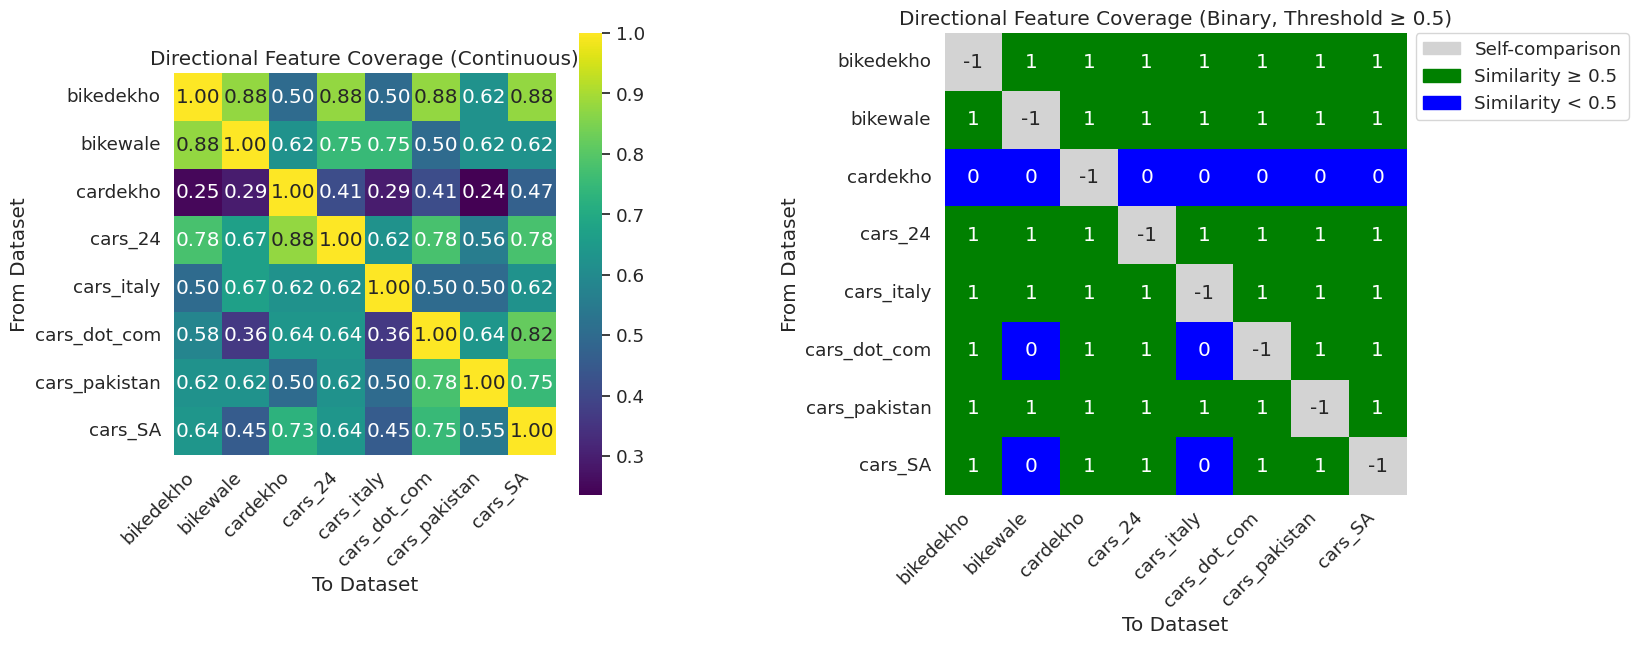

In [ ]:
import numpy as np
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

# Load the similarity metrics JSON file
with open('json_files/category_feature_space_comparisons.json', 'r') as f:
    metrics = json.load(f)

# Define your subset of interest
similar_datasets = [
    "carte_bikedekho", "carte_cardekho", "carte_used_cars_24", "carte_used_cars_pakistan",
    "carte_bikewale", "carte_used_cars_benz_italy", "carte_used_cars_saudi_arabia", "carte_used_cars_dot_com"
]

# Dictionary to hold directional similarity values
directional_similarity = {}

# Process each comparison and store directional similarities
for comparisons in metrics.values():
    for comp, details in comparisons.items():
        similar_features = details.get("similar_features", [])
        num_similar = len(similar_features)

        dissim_ds1 = details.get("dissimilar_features", {}).get("dataset1", [])
        total_ds1 = num_similar + len(dissim_ds1)

        dissim_ds2 = details.get("dissimilar_features", {}).get("dataset2", [])
        total_ds2 = num_similar + len(dissim_ds2)

        ds1, ds2 = [s.strip() for s in comp.split("vs")]

        if ds1 in similar_datasets and ds2 in similar_datasets:
            sim_ds1_to_ds2 = num_similar / total_ds1 if total_ds1 else 0
            sim_ds2_to_ds1 = num_similar / total_ds2 if total_ds2 else 0

            directional_similarity[(ds1, ds2)] = sim_ds1_to_ds2
            directional_similarity[(ds2, ds1)] = sim_ds2_to_ds1

# Filter only those datasets that are part of at least one directional similarity
included_datasets = sorted(set(ds for pair in directional_similarity for ds in pair))

# Warn about any missing ones from your list
missing = set(similar_datasets) - set(included_datasets)
if missing:
    print(f"Warning: The following datasets were not found in comparisons and are skipped: {missing}")

# Map full names to short display names
def strip_prefix(name):
    name = name.replace("carte_", "").replace("used_", "")
    if name == "cars_benz_italy":
        return "cars_italy"
    if name == "cars_saudi_arabia":
        return "cars_SA"
    return name

name_mapping = {ds: strip_prefix(ds) for ds in included_datasets}
display_names = [name_mapping[ds] for ds in included_datasets]

# Build the similarity matrix
matrix = pd.DataFrame(index=included_datasets, columns=included_datasets, dtype=float)
for ds in included_datasets:
    matrix.loc[ds, ds] = 1.0
for (ds1, ds2), sim in directional_similarity.items():
    matrix.loc[ds1, ds2] = sim
matrix = matrix.fillna(0)

# Binary and masked matrix
matrix_binary = matrix.applymap(lambda x: 1 if x >= 0.5 else 0)
# Assign 2 to diagonal (self-comparison) in binary matrix
for ds in included_datasets:
    matrix_binary.loc[ds, ds] = -1

matrix_masked = np.ma.masked_equal(matrix.values, 0)

# Colormaps
cmap_cont = cm.get_cmap("viridis").copy()
cmap_cont.set_bad(color="lightgrey")
cmap_binary = ListedColormap(["lightgrey", "blue", "green"])

# Seaborn style
sns.set(style="whitegrid", font_scale=1.2)

# Plot with more space between the two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'wspace': 0.6})

# Continuous heatmap
sns.heatmap(matrix_masked, cmap=cmap_cont, cbar=True, annot=True, fmt=".2f",
            xticklabels=display_names, yticklabels=display_names, ax=axs[0], square=True)
axs[0].set_title("Directional Feature Coverage (Continuous)")
axs[0].set_xlabel("To Dataset")
axs[0].set_ylabel("From Dataset")

# Binary heatmap
sns.heatmap(matrix_binary, cmap=cmap_binary, cbar=False, annot=True, fmt="d",
            xticklabels=display_names, yticklabels=display_names, ax=axs[1], square=True)
axs[1].set_title("Directional Feature Coverage (Binary, Threshold ≥ 0.5)")
axs[1].set_xlabel("To Dataset")
axs[1].set_ylabel("From Dataset")

# Add legend to binary plot (outside)
legend_patches = [
    Patch(color='lightgray', label='Self-comparison'),
    Patch(color='green', label='Similarity ≥ 0.5'),
    Patch(color='blue', label='Similarity < 0.5')
]

axs[1].legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.02, 1.0), borderaxespad=0.0, frameon=True)

# Rotate x-tick labels
for ax in axs:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
        tick.set_horizontalalignment('right')

plt.show()


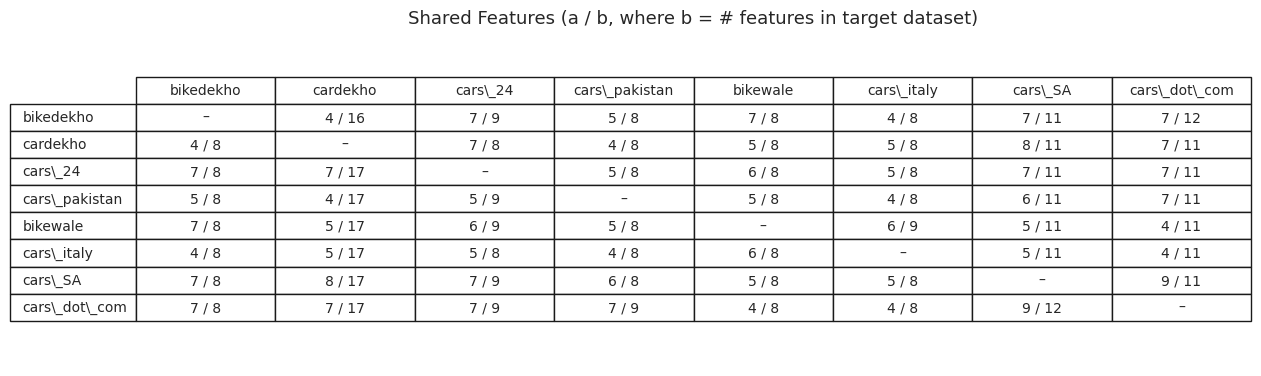

\begin{tabular}{lcccccccc}
\toprule
 & bikedekho & cardekho & cars\_24 & cars\_pakistan & bikewale & cars\_italy & cars\_SA & cars\_dot\_com \\
\midrule
bikedekho & – & 4 / 16 & 7 / 9 & 5 / 8 & 7 / 8 & 4 / 8 & 7 / 11 & 7 / 12 \\
cardekho & 4 / 8 & – & 7 / 8 & 4 / 8 & 5 / 8 & 5 / 8 & 8 / 11 & 7 / 11 \\
cars\_24 & 7 / 8 & 7 / 17 & – & 5 / 8 & 6 / 8 & 5 / 8 & 7 / 11 & 7 / 11 \\
cars\_pakistan & 5 / 8 & 4 / 17 & 5 / 9 & – & 5 / 8 & 4 / 8 & 6 / 11 & 7 / 11 \\
bikewale & 7 / 8 & 5 / 17 & 6 / 9 & 5 / 8 & – & 6 / 9 & 5 / 11 & 4 / 11 \\
cars\_italy & 4 / 8 & 5 / 17 & 5 / 8 & 4 / 8 & 6 / 8 & – & 5 / 11 & 4 / 11 \\
cars\_SA & 7 / 8 & 8 / 17 & 7 / 9 & 6 / 8 & 5 / 8 & 5 / 8 & – & 9 / 11 \\
cars\_dot\_com & 7 / 8 & 7 / 17 & 7 / 9 & 7 / 9 & 4 / 8 & 4 / 8 & 9 / 12 & – \\
\bottomrule
\end{tabular}



In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Define your subset of interest
similar_datasets = [
    "carte_bikedekho", "carte_cardekho", "carte_used_cars_24", "carte_used_cars_pakistan",
    "carte_bikewale", "carte_used_cars_benz_italy", "carte_used_cars_saudi_arabia", "carte_used_cars_dot_com"
]

# Load JSON
with open('json_files/category_feature_space_comparisons.json', 'r') as f:
    metrics = json.load(f)

# Collect comparisons and feature counts
feature_ratios = pd.DataFrame(index=similar_datasets, columns=similar_datasets, dtype=str)

for comparisons in metrics.values():
    for comp, details in comparisons.items():
        if "vs" not in comp:
            continue
        try:
            ds1, ds2 = [s.strip() for s in comp.split("vs")]
        except Exception:
            continue

        if ds1 in similar_datasets and ds2 in similar_datasets:
            sim_feats = len(details.get("similar_features", []))
            dissim_ds1 = details.get("dissimilar_features", {}).get("dataset1", [])
            dissim_ds2 = details.get("dissimilar_features", {}).get("dataset2", [])

            total_ds1 = sim_feats + len(dissim_ds1)
            total_ds2 = sim_feats + len(dissim_ds2)

            entry_1to2 = f"{sim_feats} / {total_ds2}" if total_ds2 > 0 else "0 / 0"
            entry_2to1 = f"{sim_feats} / {total_ds1}" if total_ds1 > 0 else "0 / 0"

            feature_ratios.loc[ds1, ds2] = entry_1to2
            feature_ratios.loc[ds2, ds1] = entry_2to1

# Fill diagonal
for ds in similar_datasets:
    feature_ratios.loc[ds, ds] = "–"

# Relabel rows/cols for display
def strip_prefix(name):
    name = name.replace("carte_", "").replace("used_", "")
    if name == "cars_benz_italy":
        return "cars_italy"
    if name == "cars_saudi_arabia":
        return "cars_SA"
    return name

display_labels = [strip_prefix(ds) for ds in similar_datasets]
latex_labels = [label.replace("_", r"\_") for label in display_labels]

feature_ratios.index = latex_labels
feature_ratios.columns = latex_labels

# --- Plot table ---
fig, ax = plt.subplots(figsize=(13, 4))
ax.axis('off')
table = ax.table(cellText=feature_ratios.values,
                 rowLabels=feature_ratios.index,
                 colLabels=feature_ratios.columns,
                 cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
plt.title("Shared Features (a / b, where b = # features in target dataset)", fontsize=13)
plt.tight_layout()
plt.show()

# --- LaTeX export ---
latex_table = feature_ratios.to_latex(index=True, escape=False, column_format="l" + "c" * len(similar_datasets))
print(latex_table)
